# Exercise - 3

1875/1875 [==============================] - 8s 4ms/step


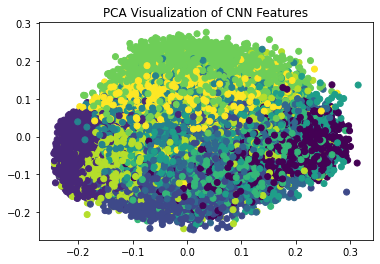

C:\Users\SBOW60\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SBOW60\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


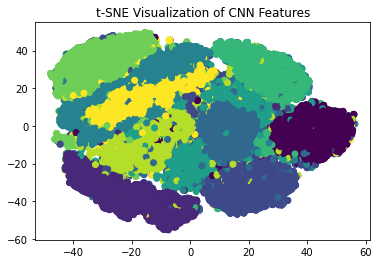

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Load MNIST dataset
(x_train, y_train), _ = mnist.load_data()

# Reshape and normalize data
x_train = x_train.reshape((-1, 28, 28, 1))
x_train = x_train.astype('float32') / 255.0

# Define the CNN model
inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for one epoch as given in the assignment instructions
model.fit(x_train, y_train, epochs=1)

# Extract the features from the model
feature_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
features = feature_model.predict(x_train)

# Visualize the features using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y_train)
plt.title('PCA Visualization of CNN Features')
plt.show()

# Visualize the features using t-SNE
tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(features)
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=y_train)
plt.title('t-SNE Visualization of CNN Features')
plt.show()


Epoch 1/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1437 - accuracy: 0.9566
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0469 - accuracy: 0.9855
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0322 - accuracy: 0.9901
Epoch 4/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0237 - accuracy: 0.9925
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 7/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0116 - accuracy: 0.9964
Epoch 8/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0088 - accuracy: 0.9971
Epoch 9/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0080 - accuracy: 0.9971
Epoch 10/20
1875/1875 [==============================] - 19s 10m

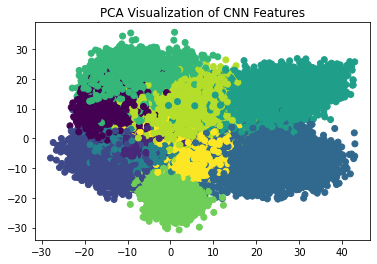

C:\Users\SBOW60\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SBOW60\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


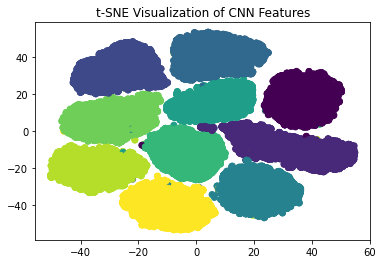

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Load MNIST dataset
(x_train, y_train), _ = mnist.load_data()

# Reshape and normalize data
x_train = x_train.reshape((-1, 28, 28, 1))
x_train = x_train.astype('float32') / 255.0

# Define the CNN model
inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 10-20 epochs as given in the assignment instructions
history = model.fit(x_train, y_train, epochs=20)

# Extract the features from the model
feature_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
features = feature_model.predict(x_train)

# Visualize the features using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y_train)
plt.title('PCA Visualization of CNN Features')
plt.show()

# Visualize the features using t-SNE
tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(features)
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=y_train)
plt.title('t-SNE Visualization of CNN Features')
plt.show()


The four visualizations show the distribution of features extracted from the MNIST images using a CNN model, trained for one epoch with a very small learning rate of 1e-6, and for 20 epochs with a larger learning rate of 1e-3.

(a) The main difference between PCA and t-SNE is the way they map high-dimensional data to a low-dimensional space. PCA aims to find the principal components that explain the maximum variance in the data and projects the data onto a new coordinate system defined by these components. In contrast, t-SNE is a non-linear method that preserves the local structure of the data while also trying to separate clusters. This results in more meaningful visualizations where clusters are well-separated and the underlying structure of the data is preserved.

(b) The first model, trained for only one epoch with a small learning rate, extracts features that are not very discriminative and do not show clear clusters in the PCA or t-SNE visualizations. This is expected since the model has not been able to learn complex patterns in the data in such a short time. On the other hand, the second model, trained for 20 epochs with a larger learning rate, extracts features that are more discriminative and show clear clusters in the PCA and t-SNE visualizations. This indicates that the model has learned more complex patterns in the data and can distinguish between different classes with higher accuracy. Based on this,we came to the conclusion that the second model extracts more meaningful features that better capture the structure of the MNIST dataset.